<a href="https://colab.research.google.com/github/kwanda2426/projects/blob/main/sensifeye/notebook_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Phone Call Marketing Campaign**

<img src="https://cdn.searchenginejournal.com/wp-content/uploads/2020/01/shutterstock_181457837-5e3199d4b1202.png" >

# **Term Deposit Subscription Prediction**

- **Kwanda Mazibuko**

## Table of contents
1. [Introduction](#intro)
2. [Data Collection](#data)
3. [Data Preprocessing](#cleaning)
4. [Exploratory Data Analysis](#EDA)
5. [Feature Engineering And Selection](#features)
6. [Model Building And Evaluation](#model)
7. [Conclusion](#conclusion)
8. [References](#references)

<a id="intro"></a>
# 1. **Introduction**

**Problem Statement**

As we are diving deep into the field of artificial intelligence, we are coming across ways in which AI can leverage human life and potentially save them from disasters in the coming future. One such small step towards this far but promising future is to use data from past and find some patterns which are universal in nature and which can promise some accurate prediction thereby helping humans minimize the effects of disaster.


There has been a revenue decline for the bank and they would like to know what actions to take. After investigation, it was found that the root cause is that their clients are not depositing as frequently as before. Term deposits allow banks to hold onto a deposit for a specific amount of time, so banks can lend more and thus make more profits. In addition, banks also hold better chance to persuade term deposit clients into buying other products such as funds or insurance to further increase their revenues.


**Objective**

We build a machine learning model to predict if the clients will subscribe a term deposit. 

<a id="data"></a>
# 2. **Data Collection**

The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution.

# **Importing Libraries**

In [3]:
!pip install imblearn
!pip install smote 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
# Libraries for data loading, data manipulation and data visulisation
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns
from statsmodels.graphics.correlation import plot_corr
from scipy.stats import skew
from scipy.stats import kurtosis
import statistics

# datetime
import requests
import io
import datetime

# Libraries for data preparation and model building
from sklearn.utils import resample
from sklearn.preprocessing import LabelEncoder
import statsmodels.formula.api as sm
from statsmodels.formula.api import ols
from sklearn import metrics
from sklearn.svm import SVR
from xgboost.sklearn import XGBRegressor
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import SelectKBest, chi2
from scipy.stats import boxcox, zscore
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor, VotingRegressor, StackingRegressor, BaggingRegressor, AdaBoostRegressor
from sklearn.linear_model import Lasso, Ridge, LinearRegression
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, PolynomialFeatures

# saving my model
import pickle

#ignoring warnings
import warnings
warnings.filterwarnings('ignore')

#ignoring warnings
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

#making sure that we can see all rows and cols
pd.set_option('display.max_columns', None)

pd.set_option('display.max_rows', None)

### **Loading Data**

In [6]:
url = "https://github.com/kwanda2426/projects/blob/main/sensifeye/BankCustomerData.csv?raw=true" # Make sure the url is the raw version of the file on GitHub
download = requests.get(url).content

# Reading the downloaded content and turning it into a pandas dataframe
df = pd.read_csv(io.StringIO(download.decode('utf-8')))
#https://github.com/kwanda2426/projects/blob/5afdf8d70a6b466c43ea16cbc23c911249f3d633/sensifeye/BankCustomerData.csv

In [7]:
# Read file
df_train = df

# view first 20 rows
df_train.head(20)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,term_deposit
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [8]:
# Checking how our training dataset looks like
print("Rows    : ", df_train.shape[0])

print("Columns : ", df_train.shape[1])

print("\nMissing values: ", df_train.isnull().sum().values.sum())

print("\nInformation about the data: ")
print("  \n", df_train.info())
 
print("\nAbout the data: \n")

# Check how many unique items are in each column of the dateframe
for col_name in df_train.columns:
    unique_out = len(df_train[col_name].unique())
    print(f"Feature '{col_name}' has {unique_out} unique categories \n") 

Rows    :  42639
Columns :  17

Missing values:  0

Information about the data: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42639 entries, 0 to 42638
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   age           42639 non-null  int64 
 1   job           42639 non-null  object
 2   marital       42639 non-null  object
 3   education     42639 non-null  object
 4   default       42639 non-null  object
 5   balance       42639 non-null  int64 
 6   housing       42639 non-null  object
 7   loan          42639 non-null  object
 8   contact       42639 non-null  object
 9   day           42639 non-null  int64 
 10  month         42639 non-null  object
 11  duration      42639 non-null  int64 
 12  campaign      42639 non-null  int64 
 13  pdays         42639 non-null  int64 
 14  previous      42639 non-null  int64 
 15  poutcome      42639 non-null  object
 16  term_deposit  42639 non-null  object
dtypes: int6

In [30]:
df_train.describe()

,age,balance,day,duration,campaign,pdays,previous
count,42639.000000,42639.000000,42639.000000,42639.000000,42639.000000,42639.000000,42639.000000
mean,40.788808,1331.863951,15.854781,255.957504,2.816412,34.169141,0.465442
std,10.200236,3011.537676,8.293901,258.361368,3.163564,92.041713,2.166705
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,62.000000,8.000000,101.000000,1.000000,-1.000000,0.000000
50%,39.000000,429.000000,16.000000,177.000000,2.000000,-1.000000,0.000000
75%,48.000000,1381.500000,21.000000,315.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,536.000000,275.000000


<a id="cleaning"></a>
## 3. **Data Preprocessing**

<a id="EDA"></a>
## 4. **Exploratory Data Analysis**

In [ ]:
import plotly.express as px
import plotly.graph_objects as go

labels = ['yes','no']
values = [df_train[df_train['term_deposit'] == 'yes'].shape[0] , df_train[df_train['term_deposit'] == 'no'].shape[0]]

# Use `hole` to create a donut-like pie chart
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])
fig.show()

- The data is not evenly classified. We see that not many people subscribe to the term deposit.

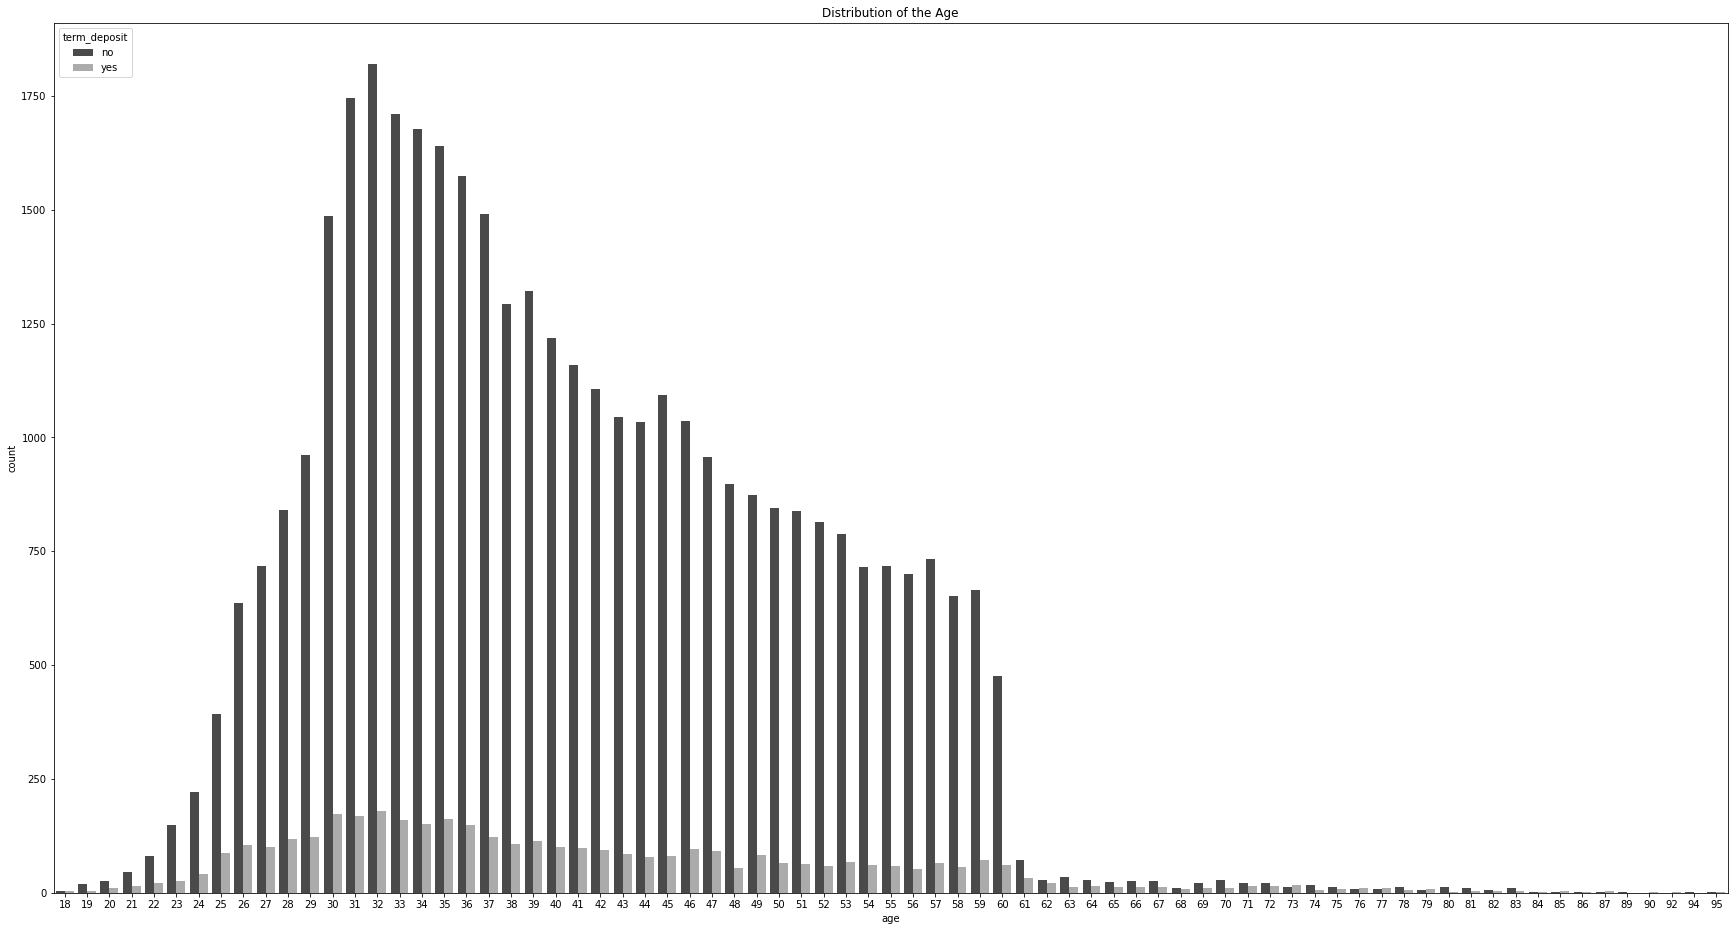

In [32]:
fig, ax = plt.subplots(1, 1, figsize=(30, 16))

sns.countplot(x = 'age', data = df_train, hue = "term_deposit", palette =  ['#4A4A4A','#ABABAB'])

plt.title("Job distribution");

plt.title("Distribution of the Age");

- It is clear that no so many people subscribe to term deposit especially the abouve 6o group and the one below 25. Hence it is clear that the campaign should shift its focus to only people from the age of 25 upto 60.

In [33]:
df_train.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'term_deposit'],
      dtype='object')

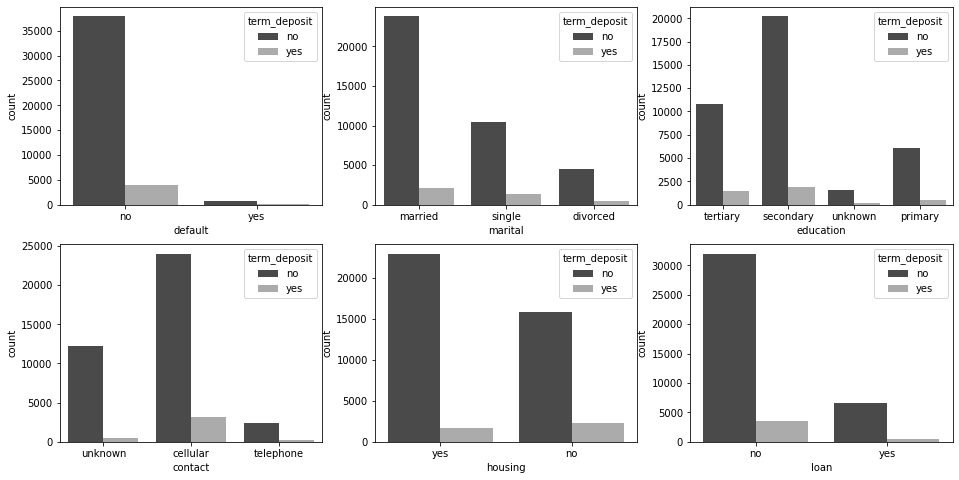

In [34]:
fig, ax = plt.subplots(2, 3, figsize=(16, 8))

sns.countplot(x = 'default', data = df_train, hue = "term_deposit", palette = ['#4A4A4A','#ABABAB'], ax = ax[0,0])
sns.countplot(x = 'marital', data = df_train, hue = "term_deposit", palette =  ['#4A4A4A','#ABABAB'], ax = ax[0,1])
sns.countplot(x = 'education', data = df_train, hue = "term_deposit",palette =  ['#4A4A4A','#ABABAB'], ax = ax[0,2])
sns.countplot(x = 'contact', data = df_train, hue = "term_deposit", palette =  ['#4A4A4A','#ABABAB'], ax = ax[1,0])
sns.countplot(x = 'housing', data = df_train, hue = "term_deposit", palette =  ['#4A4A4A','#ABABAB'], ax = ax[1,1])
sns.countplot(x = 'loan', data = df_train, hue = "term_deposit",palette =  ['#4A4A4A','#ABABAB'], ax = ax[1,2])

**Observations**

- People who have defaulted are not likely to subscribe to term deposit. These already can't pay their debt so, they are not likely to have money to save.
- People who are likey to subscribe to term deposit are married and single. 
- People with tertiary and secondary education are most likey to subscibe than the other group.
- People contacted by cellular are likey to subscribe, this may suggest that they are working, hence can't be reached by landline.
- People with housing loan should both be reached. Even though the ones with no housing are more liey to subscribe than those with the housing loan, but they do subscribe. This is because, a housing long is a long term loan, hence one can also subscribe to term deposit.
- People with a personal loan are less likrly to subscribe, this is because they already have a loan, so instead of saving, they may choose to pay the loan.

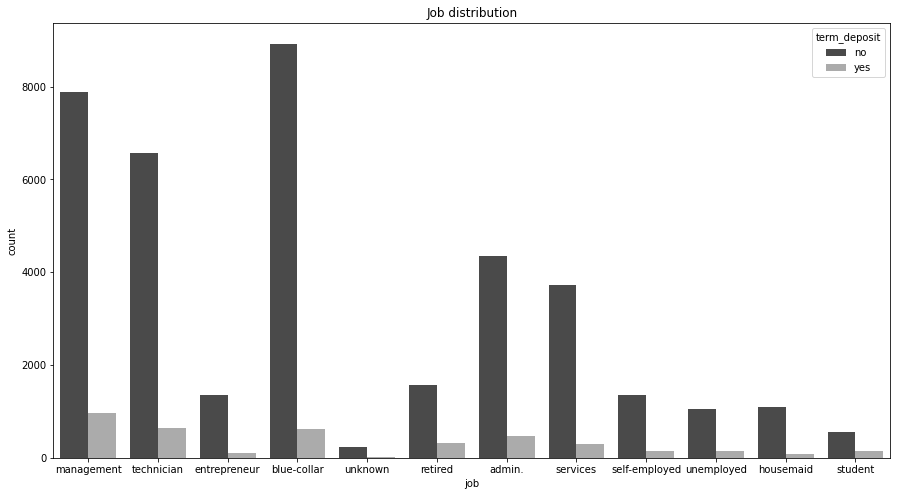

In [35]:
fig, ax = plt.subplots(1, 1, figsize=(15, 8))

sns.countplot(x = 'job', data = df_train, hue = "term_deposit", palette =  ['#4A4A4A','#ABABAB'])

plt.title("Job distribution");

**Observations**

- Maagement, technician, blue-collar, admin and services are the most reached, but do not subscribe that much. Some may be having housing loans because they have permanent jobs, hence are less likey to subscribe.
- The other groups should be focused on, as they are likely to subscribe.

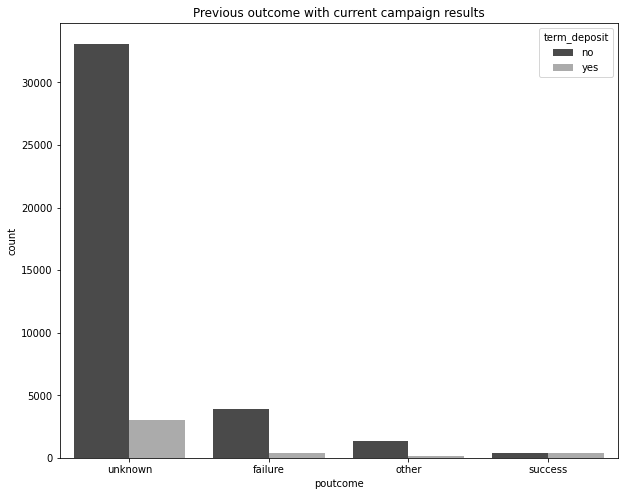

In [36]:
fig, ax = plt.subplots(1, 1, figsize=(10, 8))

sns.countplot(x = 'poutcome', data = df_train, hue = "term_deposit", palette =  ['#4A4A4A','#ABABAB'])

plt.title("Previous outcome with current campaign results")
plt.show();

**Observation**

- People who had subscribed from the previous campaign were most likely to subscribe. It could be worth keeping those clients. It may be good to give those customers some reward for referring other people to subscribe. Care must be taken to no lose these clients. 
- It is also not a bad choice to try again with those campaigns that failed. This may be that the client had a personal loan or had other debts.
- The unknown campaign results are worth investigating as to what the campaign results are because a lot of these clients do not subscribe to term deposit.

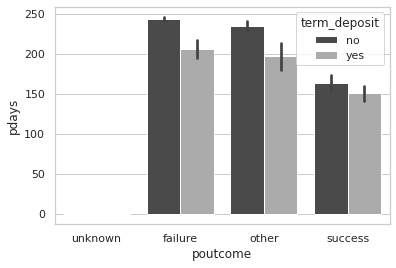

In [38]:
import seaborn as sns
sns.set_theme(style="whitegrid")

ax = sns.barplot(x = "poutcome", y="pdays", data=df_train, hue = 'term_deposit' , palette =  ['#4A4A4A','#ABABAB'])

**Observations**

- People who have never been contacted before are likey to subscribe or not subscribe to the term deposit product.
- people who are contacted less that 150 days having subscribed during the previous campaign are likey to subscribe, this may be due to the fact that they are happy with their term deposit.

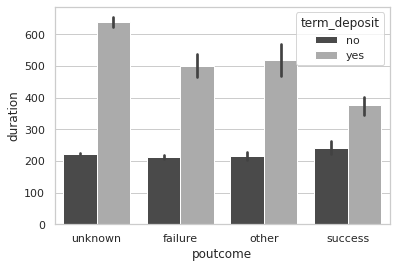

In [39]:
import seaborn as sns
sns.set_theme(style="whitegrid")

ax = sns.barplot(x = "poutcome", y="duration", data=df_train, hue = 'term_deposit' , palette =  ['#4A4A4A','#ABABAB'])

**Observations**

- The duration  of calls are more than 200 seconds.
- We the unknown previous campaign outcome needs to be investigated, the call duration takes longer than the others for the others by almost 100 seconds for the clients who subscribed.

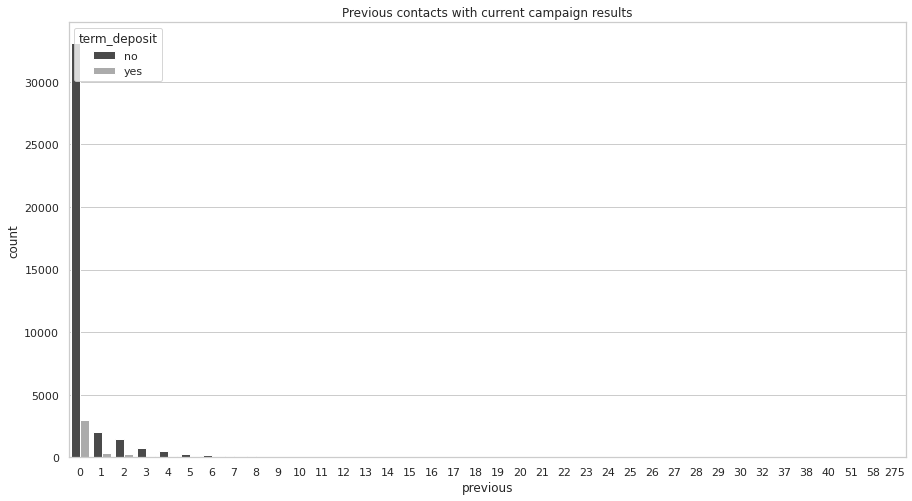

In [40]:
fig, ax = plt.subplots(1, 1, figsize=(15, 8))

sns.countplot(x = 'previous', data = df_train, hue = "term_deposit", palette =  ['#4A4A4A','#ABABAB'])

plt.title("Previous contacts with current campaign results")
plt.show();

**Observations**

- Most people who have subscribed were never contacted before. It is likey that these are the ones who already have accepted in the previous campaigns.

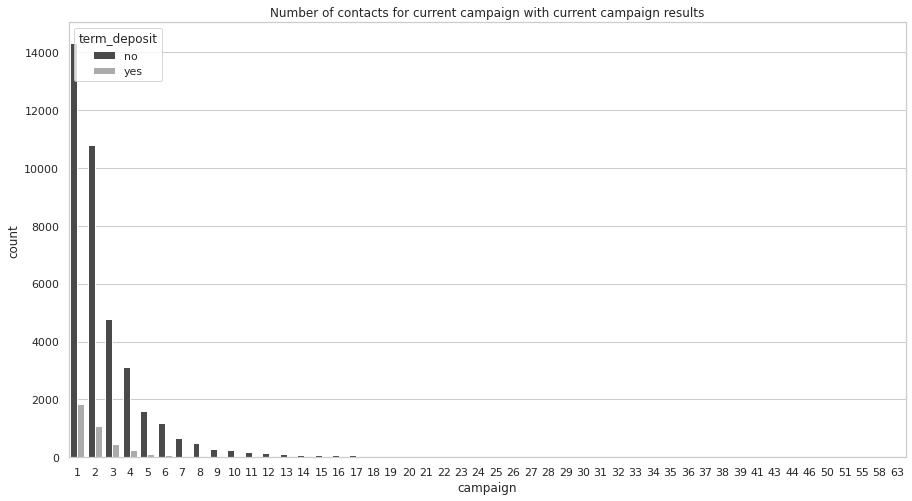

In [41]:
fig, ax = plt.subplots(1, 1, figsize=(15, 8))

sns.countplot(x = 'campaign', data = df_train, hue = "term_deposit", palette =  ['#4A4A4A','#ABABAB'])

plt.title("Number of contacts for current campaign with current campaign results")
plt.show();

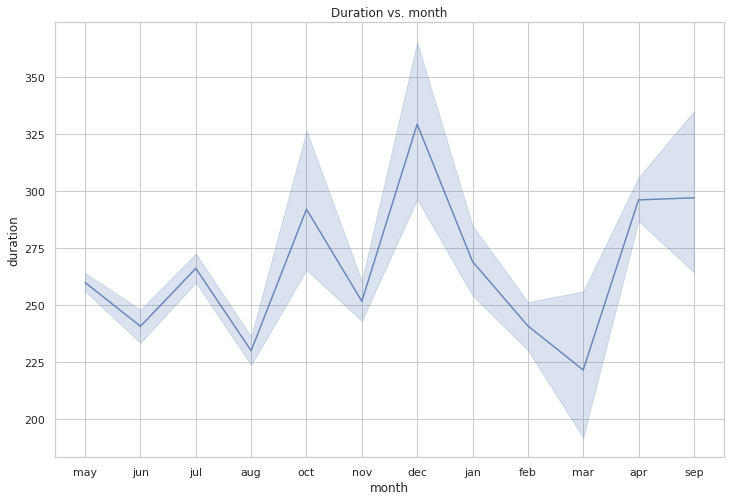

In [42]:
plt.figure(figsize=(12,8))
sns.lineplot(data = df_train, x = "month", y = "duration", alpha=0.8, sizes=(40,200))

plt.title("Duration vs. month")
plt.show()

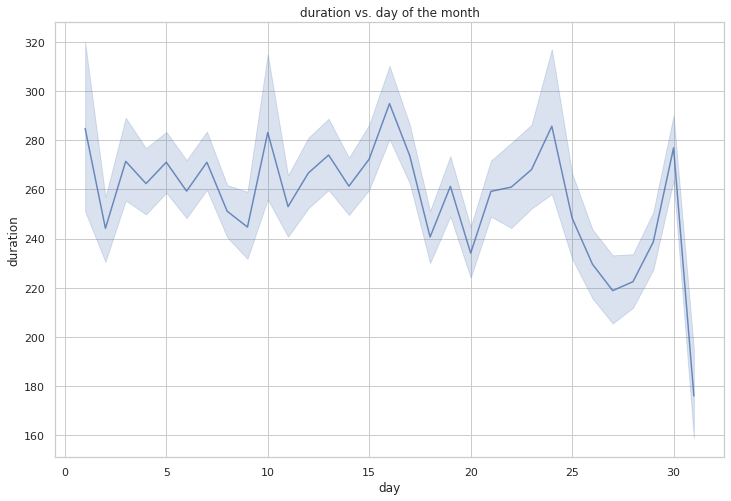

In [43]:
plt.figure(figsize=(12,8))
sns.lineplot(data = df_train, x = "day", y = "duration", alpha=0.8, sizes=(40,200))
plt.title("duration vs. day of the month")
plt.show()

<a id="features"></a>
## 5. **Feature engineering And Selection**

In [9]:
df_train.term_deposit.value_counts()

no     38678
yes     3961
Name: term_deposit, dtype: int64

### **Data Imbalance**

- We see that the data is not balanced interms of class representation, but if:
    - We upsample, we risk overfitting because a lot of data will be repeated.
    - We downsample, we risk losing a lot of valuable information.
    - We don't balance the data, we risk a model being biased towards the overly represented class.
    
Hence we work with the data as is, we choose to have valuable information over losing it or introducing uncertainties.

### **Categorical data encoding**

#### **Label Encoder**

Encode categorical features as a one-hot numeric array. LabelEncoder can be used to normalize labels. It can also be used to transform non-numerical labels (as long as they are hashable and comparable) to numerical labels.

In [10]:
def label_transform(x):
    """takes a categorical variable and encode it to numerical variable
    input: column (cat)
    output: column(numeric) """
    
    # instantiate encoder
    le = LabelEncoder()
    
    #fit_tranform
    encoded_data = le.fit_transform(x)
    
    return encoded_data

In [11]:
my_dict = {'yes': 1, 'no' : 0}

df_train['term_deposit'] = df_train['term_deposit'].replace(my_dict)

In [12]:
# categorical labels
cat_cols = ['job','marital','education','default','housing','loan','contact','month','poutcome']

df_encode = df_train.copy()
#looping through each column
for i in cat_cols:
    
    # fit and trasform each column
    df_encode[i] = label_transform(df_encode[i])

#### **Dummy Variable Encoding**

Dummies are any variables that are either one or zero for each observation. pd.get_dummies when applied to a column of categories where we have one category per observation will produce a new column (variable) for each unique categorical value. It will place a one in the column corresponding to the categorical value present for that observation. This is equivalent to one hot encoding.

In [13]:
# training data
df_train_dummies = df_train.copy()
df_train_dummies = pd.get_dummies(df_train, drop_first = True)

### **Feature Scaling data encoding**

StandardScaler removes the mean and scales the data to the unit variance. However, outliers have an influence when calculating the empirical mean and standard deviation, which narrows the range of characteristic values

In [14]:
# Instantiate scaler
scaler = StandardScaler()

# df encode
df_encode[['age','balance','campaign','pdays','previous']] = scaler.fit_transform(df_encode[['age','balance','campaign','pdays','previous']])

# df dummies
df_train_dummies[['age','balance','campaign','pdays','previous']] = scaler.fit_transform(df_train_dummies[['age','balance','campaign','pdays','previous']])

### Taking care of the imbalance

SMOTE: Synthetic Minority Oversampling Technique
SMOTE is an oversampling technique where the synthetic samples are generated for the minority class. This algorithm helps to overcome the overfitting problem posed by random oversampling.

SMOTE first selects a minority class instance a at random and finds its k nearest minority class neighbors. The synthetic instance is then created by choosing one of the k nearest neighbors b at random and connecting a and b to form a line segment in the feature space. The synthetic instances are generated as a convex combination of the two chosen instances a and b

In [15]:
# X and y df encode

X = df_encode.drop('term_deposit', axis = 1)

y = df_encode['term_deposit']

In [16]:
# X and y df get dummies

X_d = df_train_dummies.drop('term_deposit', axis = 1)

y_d = df_train_dummies['term_deposit']

Text(0, 0.5, 'Frequency')

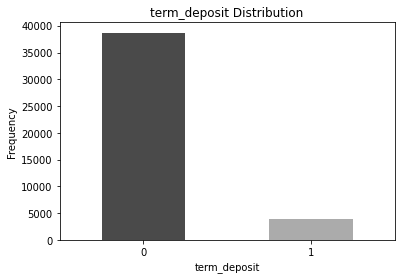

In [17]:
# bargraph displaying the imbalance
count_classes = pd.value_counts(df_encode['term_deposit'], sort = True)
count_classes.plot(kind = 'bar', rot=0, color = ['#4A4A4A','#ABABAB'])
plt.title("term_deposit Distribution")
plt.xticks(range(2), df_encode.term_deposit.value_counts().keys())
plt.xlabel("term_deposit")
plt.ylabel("Frequency")

In [18]:
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import NearMiss

# Implementing Oversampling for Handling Imbalanced 
smk = SMOTETomek(random_state=42)

X_res,y_res = smk.fit_resample(X,y)


In [19]:
y_res.value_counts()

0    38557
1    38557
Name: term_deposit, dtype: int64

In [20]:
# Implementing Oversampling for Handling Imbalanced 
smk = SMOTETomek(random_state=42)
X_res_d,y_res_d=smk.fit_resample(X_d, y_d)

In [21]:
y_res_d.value_counts()

0    38619
1    38619
Name: term_deposit, dtype: int64

Text(0, 0.5, 'Frequency')

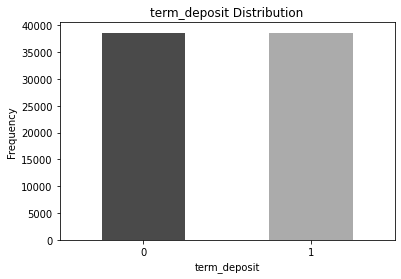

In [23]:
# bargraph displaying the balanced data
count_classes = y_res_d.value_counts()
count_classes.plot(kind = 'bar', rot=0, color = ['#4A4A4A','#ABABAB'])
plt.title("term_deposit Distribution")
plt.xticks(range(2), df_encode.term_deposit.value_counts().keys())
plt.xlabel("term_deposit")
plt.ylabel("Frequency")

<a id="model"></a>
## 6. **Model Building And Evaluation**

In [24]:
# splitting data for training and testing

X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size = 0.30, random_state = 42)



In [25]:
# splitting data for training and testing

X_train_d, X_test_d, y_train_d, y_test_d = train_test_split(X_res_d, y_res_d, test_size = 0.30, random_state = 42)

**Logistic Function**

Logistic regression is named for the function used at the core of the method, the logistic function.

The logistic function, also called the sigmoid function was developed by statisticians to describe properties of population growth in ecology, rising quickly and maxing out at the carrying capacity of the environment. It’s an S-shaped curve that can take any real-valued number and map it into a value between 0 and 1, but never exactly at those limits.

1 / (1 + e^-value)

Where e is the base of the natural logarithms (Euler’s number or the EXP() function in your spreadsheet) and value is the actual numerical value that you want to transform. Below is a plot of the numbers between -5 and 5 transformed into the range 0 and 1 using the logistic function.

Logistic Function

In [31]:
from sklearn.linear_model import LogisticRegression
 

lr = LogisticRegression().fit(X, y)

lr_d = LogisticRegression().fit(X_d, y_d)
                                             
yt_preds = lr.predict(X_test)

yt_preds_d = lr_d.predict(X_test_d)

from sklearn.metrics import classification_report
print("classification report for Label Encoded") 
print(classification_report(y_test, yt_preds))


from sklearn.metrics import classification_report
print("classification report for get_dummies") 
print(classification_report(y_test, yt_preds))

classification report for Label Encoded
              precision    recall  f1-score   support

           0       0.57      0.99      0.72     11535
           1       0.95      0.26      0.40     11600

    accuracy                           0.62     23135
   macro avg       0.76      0.62      0.56     23135
weighted avg       0.76      0.62      0.56     23135

classification report for get_dummies
              precision    recall  f1-score   support

           0       0.57      0.99      0.72     11535
           1       0.95      0.26      0.40     11600

    accuracy                           0.62     23135
   macro avg       0.76      0.62      0.56     23135
weighted avg       0.76      0.62      0.56     23135



In [32]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test, yt_preds)
np.set_printoptions(precision=2)
cnf_matrix

array([[11369,   166],
       [ 8631,  2969]])

**GradientBoostingClassifier**

Gradient-boosted trees (GBTs) are a popular classification and regression method using ensembles of decision trees. A decision tree is a decision support tool that uses a tree-like model of decisions and their possible consequences, including chance event outcomes, resource costs, and utility.
Gradient boosting is a machine learning technique used in regression and classification tasks, among others. It gives a prediction model in the form of an ensemble of weak prediction models, which are typically decision trees.When a decision tree is the weak learner, the resulting algorithm is called gradient-boosted trees.

In [42]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import f1_score

GBC = GradientBoostingClassifier(n_estimators = 200, learning_rate = 1.0, max_depth = 5)
GBC.fit(X_train, y_train)

GBC_d = GradientBoostingClassifier(n_estimators = 200, learning_rate = 1.0, max_depth = 5)
GBC_d.fit(X_train_d, y_train_d)

yt_preds = GBC.predict(X_test)

yt_preds_d = GBC_d.predict(X_test_d)

from sklearn.metrics import classification_report
print("classification report for Label Encoded") 
print(classification_report(y_test, yt_preds))


from sklearn.metrics import classification_report
print("classification report for get_dummies") 
print(classification_report(y_test_d, yt_preds_d))

print("Confusion Matrix")
print(confusion_matrix(y_test_d, yt_preds_d))

classification report for Label Encoded
              precision    recall  f1-score   support

           0       0.94      0.95      0.95     11535
           1       0.95      0.94      0.95     11600

    accuracy                           0.95     23135
   macro avg       0.95      0.95      0.95     23135
weighted avg       0.95      0.95      0.95     23135

classification report for get_dummies
              precision    recall  f1-score   support

           0       0.94      0.95      0.95     11569
           1       0.95      0.94      0.95     11603

    accuracy                           0.95     23172
   macro avg       0.95      0.95      0.95     23172
weighted avg       0.95      0.95      0.95     23172

Confusion Matrix
[[10977   592]
 [  648 10955]]


In [30]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test_d, yt_preds_d)
np.set_printoptions(precision=2)
cnf_matrix

array([[10969,   600],
       [  648, 10955]])

### **Random Forest Classifier**

Random forests or random decision forests is an ensemble learning method for classification, regression and other tasks that operates by constructing a multitude of decision trees at training time. For classification tasks, the output of the random forest is the class selected by most trees.

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

rfc = RandomForestClassifier(n_estimators=100, max_depth=5,
                                     random_state=0, class_weight="balanced")

#train the model 
rfc.fit(X_train ,y_train)


rfc_d = RandomForestClassifier(n_estimators=100, max_depth=5,
                                     random_state=0, class_weight="balanced")

#train the model 
rfc_d.fit(X_train_d ,y_train_d)

yt_preds = rfc.predict(X_test)

yt_preds_d = rfc_d.predict(X_test_d)


from sklearn.metrics import classification_report
print("classification report for Label Encoded") 
print(classification_report(y_test, yt_preds))


from sklearn.metrics import classification_report
print("classification report for get_dummies") 
print(classification_report(y_test_d, yt_preds_d))

classification report for Label Encoded
              precision    recall  f1-score   support

           0       0.89      0.86      0.87     11535
           1       0.86      0.90      0.88     11600

    accuracy                           0.88     23135
   macro avg       0.88      0.88      0.88     23135
weighted avg       0.88      0.88      0.88     23135

classification report for get_dummies
              precision    recall  f1-score   support

           0       0.92      0.89      0.91     11569
           1       0.90      0.93      0.91     11603

    accuracy                           0.91     23172
   macro avg       0.91      0.91      0.91     23172
weighted avg       0.91      0.91      0.91     23172



In [34]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test, yt_preds)
np.set_printoptions(precision=2)
cnf_matrix

array([[ 9873,  1662],
       [ 1204, 10396]])

### **Linear SVC Model**

The objective of a Linear SVC (Support Vector Classifier) is to fit to the data you provide, returning a "best fit" hyperplane that divides, or categorizes, your data. From there, after getting the hyperplane, you can then feed some features to your classifier to see what the "predicted" class is.

In [35]:
from sklearn.svm import LinearSVC
linear_svc = LinearSVC(C = 1)

#train the model 
linear_svc.fit(X_train, y_train)
#Validate The Model

linear_svc_d = LinearSVC(C = 1)

#train the model 
linear_svc_d.fit(X_train_d, y_train_d)
#Validate The Model

yt_preds = linear_svc.predict(X_test)

yt_preds_d = linear_svc_d.predict(X_test_d)


from sklearn.metrics import classification_report
print("classification report for Label Encoded") 
print(classification_report(y_test, yt_preds))


from sklearn.metrics import classification_report
print("classification report for get_dummies") 
print(classification_report(y_test_d, yt_preds_d))

classification report for Label Encoded
              precision    recall  f1-score   support

           0       0.92      0.71      0.80     11535
           1       0.76      0.94      0.84     11600

    accuracy                           0.82     23135
   macro avg       0.84      0.82      0.82     23135
weighted avg       0.84      0.82      0.82     23135

classification report for get_dummies
              precision    recall  f1-score   support

           0       0.93      0.94      0.94     11569
           1       0.94      0.93      0.94     11603

    accuracy                           0.94     23172
   macro avg       0.94      0.94      0.94     23172
weighted avg       0.94      0.94      0.94     23172



In [36]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test, yt_preds )
np.set_printoptions(precision=2)
cnf_matrix

array([[ 8137,  3398],
       [  663, 10937]])

In [37]:
# Dictionary of results
from sklearn.metrics import f1_score
results_dict = {'Label Encoding':
                    {
                        "GradientBoostingClassifier": f1_score(y_test, GBC.predict(X_test)),
                        "RandomForestClassifier": f1_score(y_test, rfc.predict(X_test)),
                        "SupportVectorMachine": f1_score(y_test,linear_svc.predict(X_test)),
                        "LogisticRegression": f1_score(y_test, lr.predict(X_test))
                        
                    },
                    'Get_Dummies Encoding':
                    {
                        "GradientBoostingClassifier": f1_score(y_test_d, GBC_d.predict(X_test_d)),
                        "RandomForestClassifier": f1_score(y_test_d, rfc_d.predict(X_test_d)),
                        "SupportVectorMachine": f1_score(y_test_d, linear_svc_d.predict(X_test_d)),
                        "LogisticRegression": f1_score(y_test_d, lr_d.predict(X_test_d))
                        
                    }

                }

# Create dataframe from dictionary
results = pd.DataFrame(results_dict)
results.head()

,Label Encoding,Get_Dummies Encoding
GradientBoostingClassifier,0.945527,0.946109
RandomForestClassifier,0.878857,0.910139
SupportVectorMachine,0.843416,0.935669
LogisticRegression,0.402986,0.576608


<a id="conclusion"></a>
## 8. **Conclusion**

<a id="references"></a>
## 9. **References**

1. https://www.kaggle.com/code/residentmario/oversampling-with-smote-and-adasyn/notebook

2. https://www.analyticsvidhya.com/blog/2021/06/5-techniques-to-handle-imbalanced-data-for-a-classification-problem/#:~:text=Imbalanced%20data%20refers%20to%20those,understand%20it%20with%20an%20example.